In [32]:
from GlucoCheck.glucoCheck import glucoCheckOps
import pandas as pd
import random
import numpy as np
from tqdm.auto import tqdm

In [33]:
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

import random
import re
from dateutil.parser import parse

import warnings  
warnings.filterwarnings('ignore')

import os


In [55]:
def createGap(df,start,end):
    """
    Creating a Gap
    input:
        start: seed
        end: seed + gap
    output:
        df: dataframe with index => DisplayTime value => GlucoseValues and a gap from start to end (inputs)
    """

    #df = readData()
    l = len(df.index)
    if end>l:
        end = l
        
    for i in range(start,end):
        df['GlucoseValue'][i]=0
    
    return df

In [56]:
data = pd.read_csv("~/Desktop/NCSA_genomics/Python - notebooks/GlucoCheck/Data/Hall/data_hall_raw.csv")
data['Display Time'] = pd.to_datetime(data['Display Time'])
data['GlucoseValue'] = pd.to_numeric(data['GlucoseValue'])
df = data[data['subjectId']=='1636-69-032']
df = df.reset_index(drop=True)

In [57]:
df.to_csv('~/Desktop/original.csv')
df

,Display Time,GlucoseValue,subjectId
0,2016-01-13 12:58:17,122,1636-69-032
1,2016-01-13 13:03:17,123,1636-69-032
2,2016-01-13 13:08:17,124,1636-69-032
3,2016-01-13 13:13:17,128,1636-69-032
4,2016-01-13 13:18:17,133,1636-69-032
...,...,...,...
1778,2016-01-19 17:12:49,101,1636-69-032
1779,2016-01-19 17:17:49,98,1636-69-032
1780,2016-01-19 17:22:49,101,1636-69-032
1781,2016-01-19 17:27:49,106,1636-69-032


Object Created!


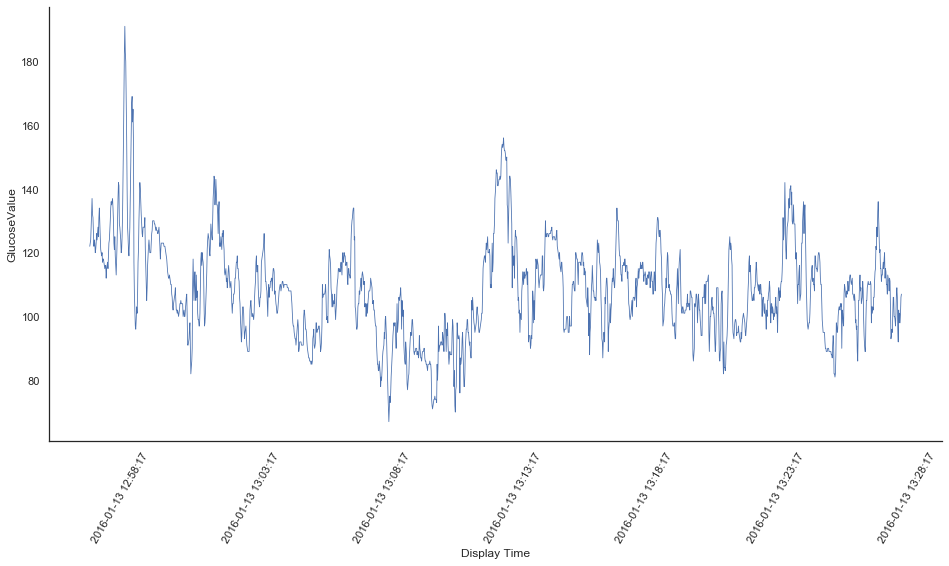

In [58]:
obj = glucoCheckOps()
obj.plot(df)


In [201]:
from random import randrange
start = 1050
end = start+5



In [202]:
data_with_gap = df.copy()
data_with_gap = createGap(data_with_gap,start,end)

In [203]:
data_with_gap = data_with_gap.drop(data_with_gap.columns[[0]], axis=1)
data_with_gap = data_with_gap.set_index(['Display Time'], drop=True)
display(data_with_gap)

,GlucoseValue,subjectId
Display Time,,
2016-01-13 12:58:17,122,1636-69-032
2016-01-13 13:03:17,123,1636-69-032
2016-01-13 13:08:17,124,1636-69-032
2016-01-13 13:13:17,128,1636-69-032
2016-01-13 13:18:17,133,1636-69-032
...,...,...
2016-01-19 17:12:49,101,1636-69-032
2016-01-19 17:17:49,98,1636-69-032
2016-01-19 17:22:49,101,1636-69-032


In [204]:
data_with_gap.to_csv('~/Desktop/data_with_gap.csv')

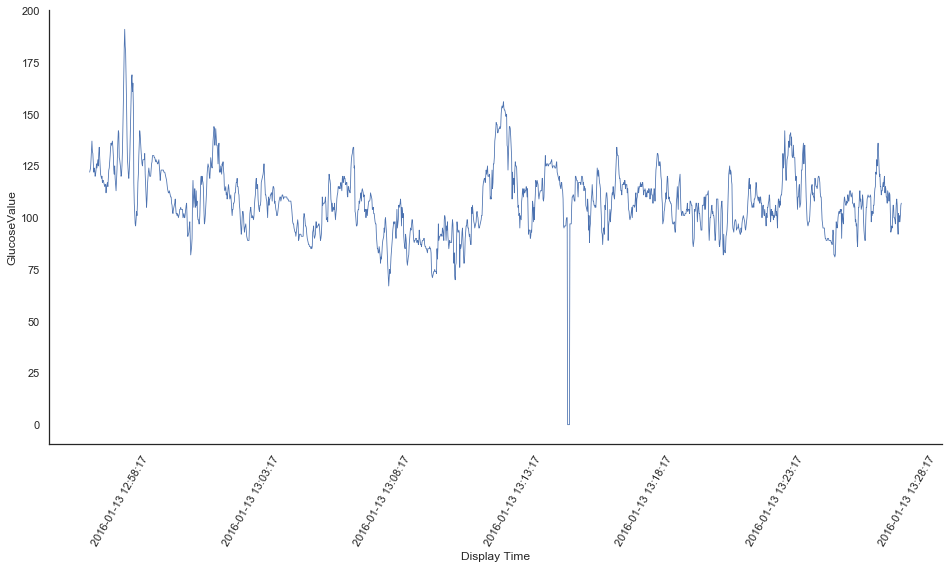

In [205]:
obj.plot(data_with_gap)

In [92]:
obj.train()


Training Model...


Epoch 1/1
200017/200017 [==============================] - 457s 2ms/step - loss: 6.1640e-04
Model trained successfully!


In [206]:
imputed_data = obj.impute(data_with_gap,1)

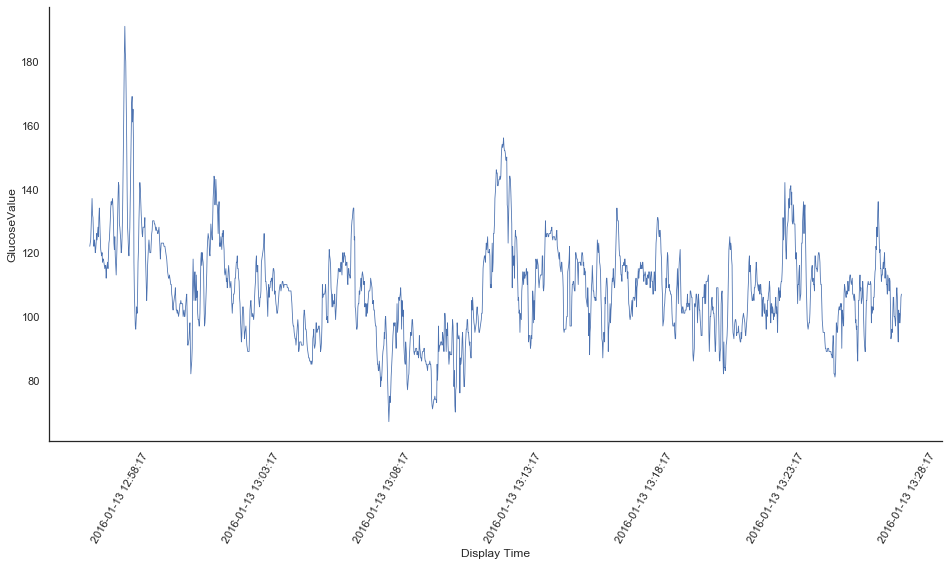

In [207]:
obj.plot(imputed_data)

In [208]:
imputed_data.to_csv('~/Desktop/imputed_values.csv')

In [209]:
mad = obj.mad(np.asarray(imputed_data['GlucoseValue'].tolist()),np.asarray(df['GlucoseValue'].tolist()))
ioa = obj.index_agreement(np.asarray(imputed_data['GlucoseValue'].tolist()),np.asarray(df['GlucoseValue'].tolist()))
rmse = obj.rmse(np.asarray(imputed_data['GlucoseValue'].tolist()),np.asarray(df['GlucoseValue'].tolist()))
mape = obj.mape(np.asarray(imputed_data['GlucoseValue'].tolist()),np.asarray(df['GlucoseValue'].tolist()))
    

In [210]:
ioa

0.9987459619658883

In [211]:
mad

0.056646102075154234

In [212]:
rmse

1.0798205122866056

In [213]:
mape

0.05862026708028419

In [214]:
zz = imputed_data
yy = df

In [215]:
len(zz.index)

1783

[Text(0, 0, '2016-01-13 12:58:17'),
 Text(0, 0, '2016-01-13 13:03:17'),
 Text(0, 0, '2016-01-13 13:08:17'),
 Text(0, 0, '2016-01-13 13:13:17'),
 Text(0, 0, '2016-01-13 13:18:17'),
 Text(0, 0, '2016-01-13 13:23:17'),
 Text(0, 0, '2016-01-13 13:28:17')]

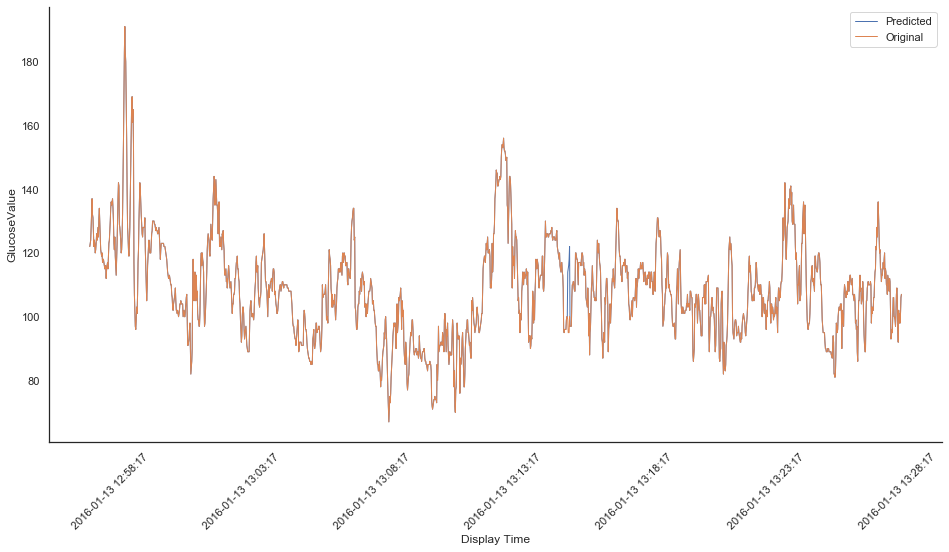

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,8))
sns.set(style="white")
fig = sns.lineplot(x = zz['Display Time'], y = zz['GlucoseValue'],
             data=zz, palette="tab10", linewidth=1, label='Predicted')
fig = sns.lineplot(x = yy['Display Time'], y = yy['GlucoseValue'],
             data=yy, palette="tab10", linewidth=1, label='Original')
sns.despine()
fig.set_xticklabels(labels=zz['Display Time'], rotation=45, ha='right')